In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fulldata/Dataentry.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


**Number of each diseases by patient gender**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


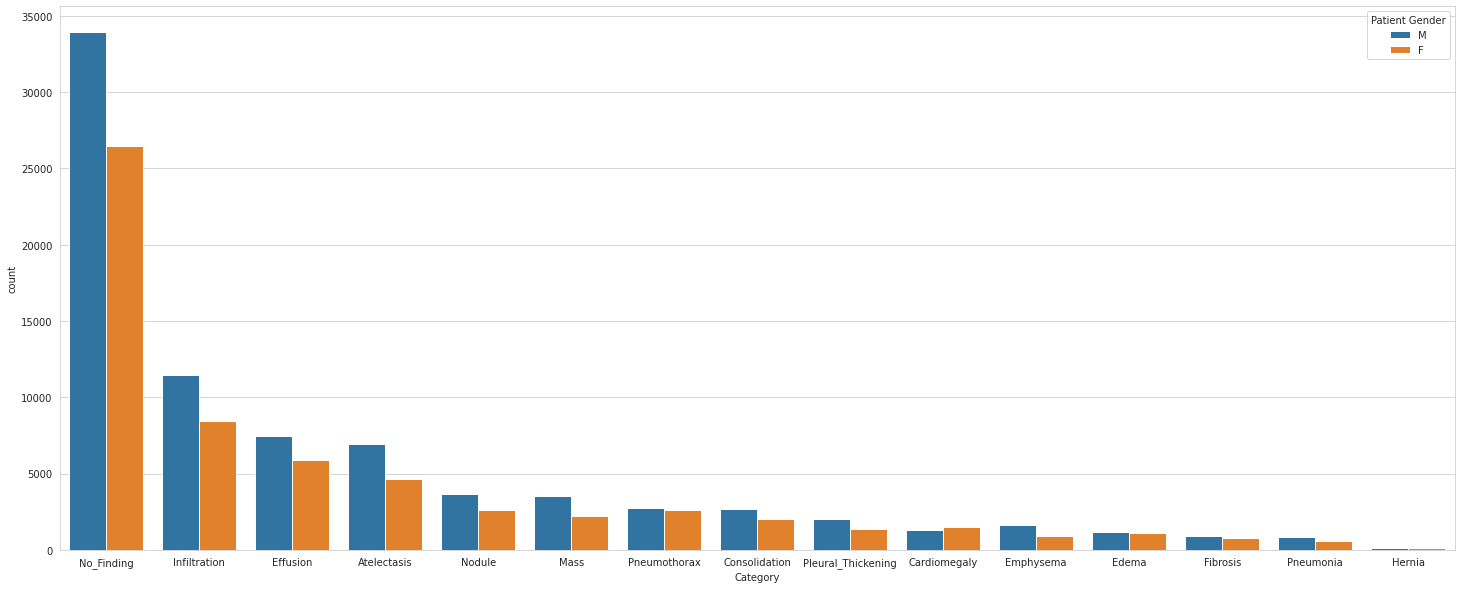

In [0]:
diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#split diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0).astype(int)

df['No_Finding']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df['Finding']=df['Finding Labels'].apply(lambda x: 0 if 'No Finding' in x else 1)

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(diseases + ['No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

**Distribution of Patient Gender and Finding any diseases**

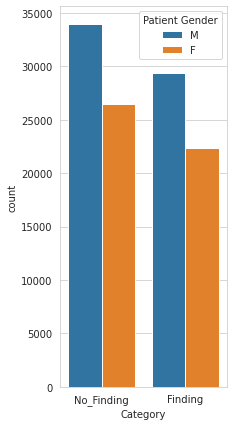

In [0]:
plt.figure(figsize=(3,7))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(['Finding', 'No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

**Distribution of Patient Gender and View Position**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


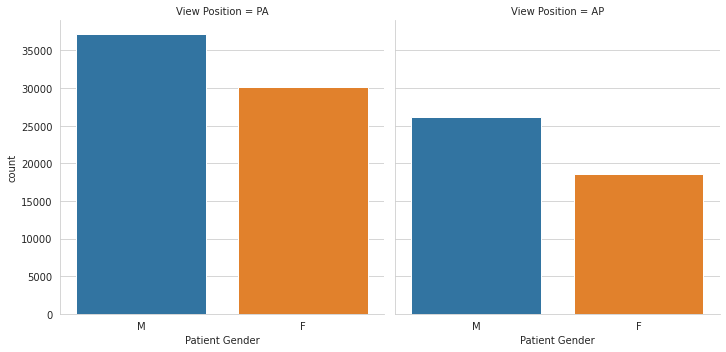

In [0]:
sns.factorplot(x="Patient Gender", col="View Position",data=df, kind="count");

**Distribution of Age for each disease**

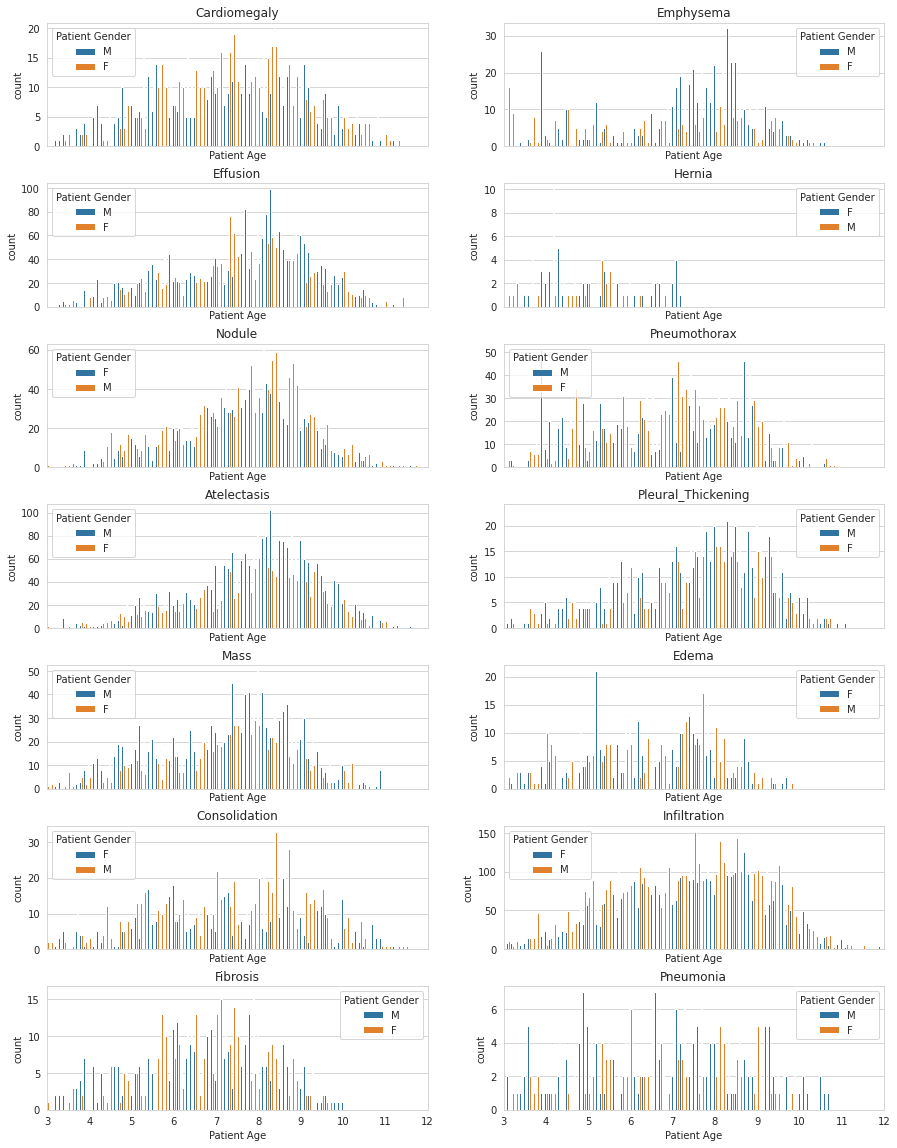

In [0]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in diseases :
    g=sns.countplot(x='Patient Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)